# チャートの使い方

# ①matplotlibマットプロットリブ

jupyter で使う場合のスタンダード  
参考文献も多いかが機能的にはかなりシンプル

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats #統計に関するライブラリ

## 美容室データを使って、分布のイメージを掴む
美容室データを読み込む

In [2]:
df_all_store_raiten = pd.read_csv("df_all_store_raiten.csv",
                                  parse_dates=["来店日"],index_col=[0])
print(df_all_store_raiten.columns)
df_all_store_raiten.head(20)

Index(['店ID', '訪問ID', '顧客ID', '来店日'], dtype='object')


/Users/yobe/homedir/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,店ID,訪問ID,顧客ID,来店日
0,1,1,38884,2003-03-09
1,1,1,38884,2003-03-09
2,1,1,38884,2003-03-09
3,1,1,38884,2003-03-09
4,1,10,43050,2003-03-09
5,1,10,43050,2003-03-09
6,1,10,43050,2003-03-09
7,1,10,43050,2003-03-09
8,1,10,43050,2003-03-09
9,1,100,44329,2003-03-12


### 店IDの要素を確認する

In [3]:
set(df_all_store_raiten["店ID"])

{1, 4, 5, 6, 11}

### 店ID=1だけを抜き出す

In [4]:
df_master1 = df_all_store_raiten[df_all_store_raiten["店ID"]==1]

### 1日当たりの来店者数を出す

In [5]:
df = df_master1[["来店日","訪問ID"]].drop_duplicates() #訪問IDの重複行を削除する
se_raiten = df.groupby("来店日")["訪問ID"].count()#来店日毎に訪問IDを数える
se_raiten.head()

来店日
2002-07-28     2
2003-03-06     1
2003-03-09    43
2003-03-10    26
2003-03-11    26
Name: 訪問ID, dtype: int64

### 時系列グラフを描く

Text(0,0.5,'Number of ID')

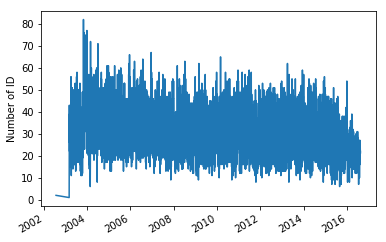

In [6]:
ax = se_raiten.plot()
ax.set_xlabel("")#xlabelを無しにする
ax.set_ylabel("Number of ID")#xlabelを無しにする

### 1日あたり来店者数のヒストグラムを描く

2004


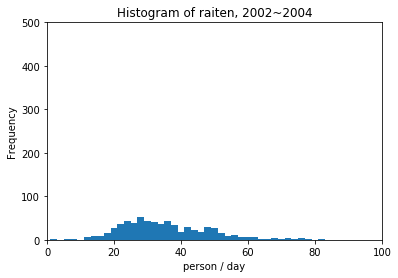

2005


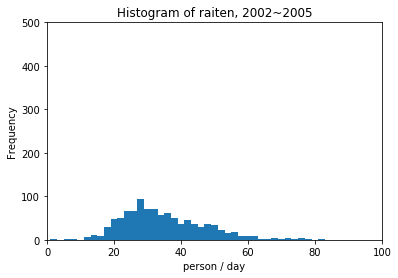

2006


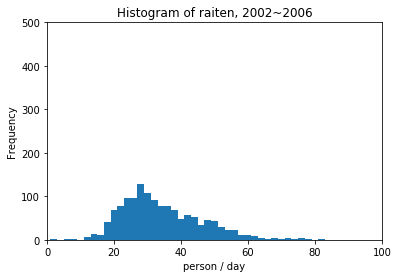

2007


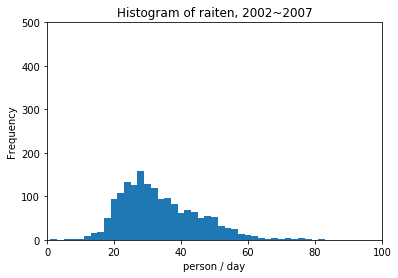

2008


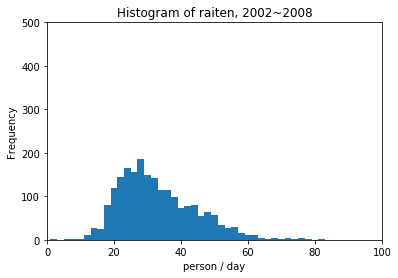

2009


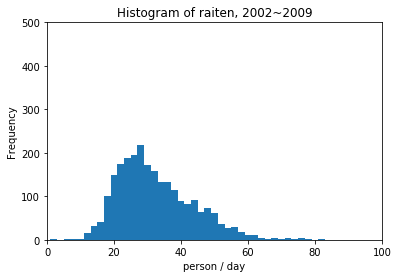

2010


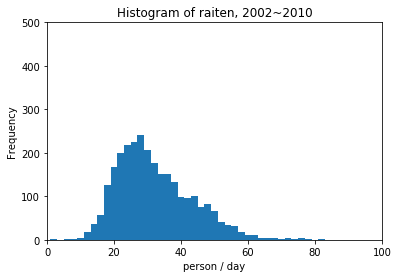

2011


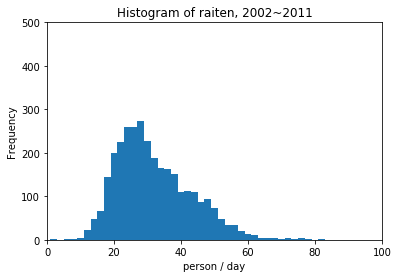

2012


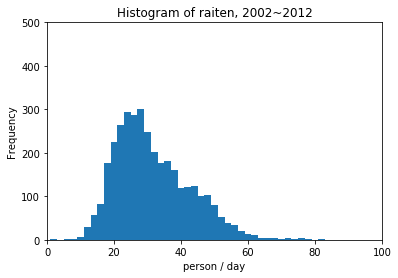

2013


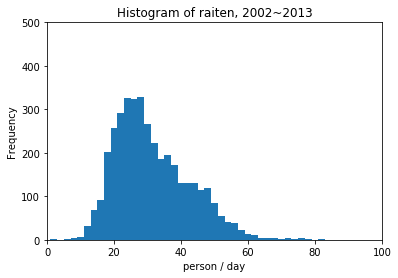

2014


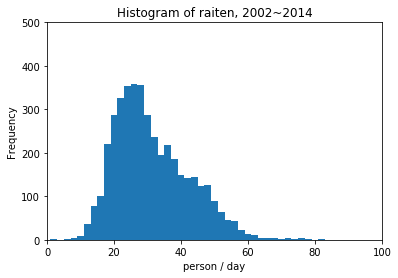

In [7]:
def graph(data,title,binwidth=5):
    """
    ヒストグラムを描く
    """
    plt.hist(data, bins=range(min(data), max(data)+1+ binwidth, binwidth))
    plt.title(title)
    plt.xlabel("person / day")
    plt.ylabel("Frequency")
    plt.xlim([0,100])
    plt.ylim([0,500])
    plt.show()
    return 

for year in range(2004,2015):
    print(year)
    se = se_raiten[se_raiten.index.year<=year]
    if len(se)==0:continue
    graph(se,title="Histogram of raiten, 2002~%s"%year,binwidth=2)

### 2002年〜2014年の来店者数を要約する

In [8]:
se_raiten.describe()

count    4812.000000
mean       29.907315
std        11.049601
min         1.000000
25%        22.000000
50%        28.000000
75%        37.000000
max        82.000000
Name: 訪問ID, dtype: float64

### [演習]
- 他店の分布も描画し、異なる店どうしを比較してみましょう。

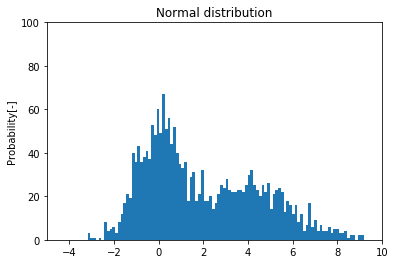

In [9]:
np.random.seed = 1234
s1 = np.random.normal(loc=0,scale=1,size=1000) 
s2 = np.random.normal(loc=4,scale=2,size=1000)
sample = np.r_[s1,s2]

fig, ax = plt.subplots(1, 1)#キャンバスを用意
ax.hist(sample,bins=100)

ax.set_title("Normal distribution")#タイトル
ax.set_ylabel("Probability[-]")#y軸名称
ax.set_ylim([0,100])#y軸の範囲を設定
ax.set_xlim([-5,10])#x軸の範囲を設定
plt.show()#描画

### 他にも色々ありますが知っているところで


serboon を紹介します。